In [1]:
import numpy as np
import pandas as pd
import glob
from astropy.table import Table
import matplotlib.pyplot as plt
import json 
import collections
import astropy

In [2]:
response_dict = {
    "#1" : 1,
    "#2" : 2,
    "#3" : 3,
    "#4" : 4,
    "#5" : 5,
    "No good match" : 0,
}

In [3]:
classification = Table.from_pandas(pd.read_csv(r'C:\Users\20xha\Documents\Caltech\Research\ZooniverseClassifications\zwicky-chemical-factory-classifications_ZTFI.csv'))

In [4]:
ccs_workflow = np.where(classification["workflow_name"] == "Core Collapse Supernovae")

In [5]:
classification[ccs_workflow][0]

classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,metadata,annotations,subject_data,subject_ids
int64,str34,float64,str20,int64,str25,float64,str23,float64,float64,str1672,str532,str485,int64
288484944,cfremling,2128769.0,cac0fc4308c97a9e3d54,16969,Core Collapse Supernovae,8.21,2020-11-20 03:06:17 UTC,--,--,"{""source"":""api"",""session"":""b07e8eff7821c34f6244ef6e4aabc4bce6d598ab906f51424d36f66c90709c84"",""viewport"":{""width"":1822,""height"":861},""started_at"":""2020-11-20T03:05:50.856Z"",""user_agent"":""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36"",""utc_offset"":""28800"",""finished_at"":""2020-11-20T03:06:17.009Z"",""live_project"":true,""interventions"":{""opt_in"":true,""messageShown"":false},""user_language"":""en"",""user_group_ids"":[],""subject_dimensions"":[{""clientWidth"":1280,""clientHeight"":720,""naturalWidth"":4800,""naturalHeight"":2700},{""clientWidth"":1280,""clientHeight"":720,""naturalWidth"":4800,""naturalHeight"":2700},{""clientWidth"":1280,""clientHeight"":720,""naturalWidth"":4800,""naturalHeight"":2700},{""clientWidth"":1280,""clientHeight"":720,""naturalWidth"":4800,""naturalHeight"":2700},{""clientWidth"":1280,""clientHeight"":720,""naturalWidth"":4800,""naturalHeight"":2700}],""subject_selection_state"":{""retired"":false,""selected_at"":""2020-11-20T03:05:50.742Z"",""already_seen"":false,""selection_state"":""normal"",""finished_workflow"":false,""user_has_finished_workflow"":false},""workflow_translation_id"":""39739""}","[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""#1""}]","{""51494375"":{""retired"":null,""z_snid"":""0.436"",""#Image0"":""snidfits_emclip_ZTF17aaazdba_20190330_P60_v1_1.png"",""#Image1"":""snidfits_emclip_ZTF17aaazdba_20190330_P60_v1_2.png"",""#Image2"":""snidfits_emclip_ZTF17aaazdba_20190330_P60_v1_3.png"",""#Image3"":""snidfits_emclip_ZTF17aaazdba_20190330_P60_v1_4.png"",""#Image4"":""snidfits_emclip_ZTF17aaazdba_20190330_P60_v1_5.png"",""!ZTF_Name"":""ZTF17aaazdba"",""z_snid_err"":""0.016"",""!ZTF_Version"":""ZTF17aaazdba_20190330_P60_v1""}}",51494375


In [6]:
subject_ids_unique = np.unique(classification[ccs_workflow]["subject_ids"])

In [7]:
right_workflow = classification[ccs_workflow]

In [8]:
len(subject_ids_unique)

10717

In [9]:
data = []
counter = 0
for ids in subject_ids_unique:
    if(counter % 200 == 0):
        print(counter)
    counter += 1
    lines = np.where(classification[ccs_workflow]["subject_ids"] == ids)[0]
    data.append([ids, lines])

0


KeyboardInterrupt: 

In [ ]:
data_np = np.asarray(data)

In [11]:
np.save(r'C:\Users\20xha\Documents\Caltech\Research\ZooniverseClassifications\zwicky-chemical-factory-classifications_ZTFI', data_np)

In [10]:
data_np = np.load(r'C:\Users\20xha\Documents\Caltech\Research\ZooniverseClassifications\zwicky-chemical-factory-classifications_ZTFI.npy', allow_pickle = True)

In [11]:
len(data_np[:,1][0])

1

In [12]:
data_array = []
for i in data_np:
    if(len(i[1]) > 10):
        data_array.append([i[0], right_workflow[i[1]]])

In [13]:
size = []
for i in data_np[:,1]:
    size.append(len(i))

In [14]:
exec("dict =" + data_array[0][1]["annotations"][0])

In [15]:
json.loads(data_array[0][1]["annotations"][0])[0]

{'task': 'T0',
 'task_label': 'Which spectrum is the best match?',
 'value': 'No good match'}

In [16]:
dict[0]["value"].split("#")[-1]

'No good match'

In [17]:
data_array[0][1]["annotations"]

"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""No good match""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""#5""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""#5""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""No good match""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":null}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""#5""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""#4""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""No good match""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""#5""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""No good match""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""No good match""}]"


In [18]:
ResultsTable_Zooniverse = Table(
                    names=("ZTF_Name", "Version", "subject_ids", "NoMatch", "#1", "#2", "#3", "#4", "#5"
                    ),
                    meta={"name": "Spectrum Results after Zooniverse"},
                    dtype=("U64", "U64", "int32", "int32", "int32", "int32", "int32", "int32", "int32"
                          )
                    )
for line in data_array:
    row = []
    data = line[1]
    metadata = json.loads(data[0]["subject_data"])[str(line[0])]
    row.append(metadata["!ZTF_Name"])
    row.append(metadata["!ZTF_Version"] + ".ascii")
    row.append(line[0])
    responses = [0, 0, 0, 0, 0, 0]
    for i in data:
        value = json.loads(i["annotations"])[0]["value"]
        if(value is not None):
            index = response_dict[value]
            responses[index] = responses[index] + 1
    row.extend(responses)
    ResultsTable_Zooniverse.add_row(row)

In [19]:
metadata = json.loads(data[0]["subject_data"])[str(line[0])]
value = json.loads(i["annotations"])[0]["value"]

In [20]:
np.sum(ResultsTable_Zooniverse["NoMatch"])

21010

In [21]:
np.sum(ResultsTable_Zooniverse["#1"])

24786

In [22]:
np.sum(ResultsTable_Zooniverse["#2"])

18503

In [23]:
np.sum(ResultsTable_Zooniverse["#3"])

17138

In [24]:
np.sum(ResultsTable_Zooniverse["#4"])

16830

In [25]:
np.sum(ResultsTable_Zooniverse["#5"])

16854

In [26]:
ResultsTable_Zooniverse.to_pandas().to_csv("ZTFI_Zooniverse_results.csv")

In [27]:
snidoutput = Table.from_pandas(pd.read_csv("snid_classes_ZTFI.csv"))

In [28]:
joined_results = astropy.table.join(snidoutput, ResultsTable_Zooniverse, join_type = "inner")

In [29]:
ResultsTable_Zooniverse_Classes = Table(
                    names=("ZTF_Name", "Version", "subject_ids", 'Ia', 'Ia-norm', 'Ia-91T', 'Ia-91bg', 'Ia-csm', 'Ia-02cx', 'Ia-03fg',
                           'Ib', 'Ib-norm', 'IIb', 'Ibn', 'Ic', 'Ic-norm', 'Ic-BL', 'Ic-SLSN', 'II', 'II-norm', 'IIn',
                           'NotSN', 'AGN', 'Gal', 'LBV', 'M-star', 'QSO', 'C-star', 'TDE', "NoMatch", "rlap", "z"
                    ),
                    meta={"name": "Vote Types"},
                    dtype=("U64", "U64", "int32", "int32", "int32", "int32", "int32", "int32" , "int32", "int32", "int32", "int32", "int32", "int32",
                           "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "float32", "float32"
                          )
                    )

for i in range(len(joined_results)):
    line = joined_results[i]
    row = [line["ZTF_Name"], line["Version"], line["subject_ids"]]
    row.extend(np.zeros(28))
    row.append(line["NoMatch"])
    ResultsTable_Zooniverse_Classes.add_row(row)
    ResultsTable_Zooniverse_Classes[i][line["c_snid_1"]] += line["#1"]
    ResultsTable_Zooniverse_Classes[i][line["c_snid_2"]] += line["#2"]
    ResultsTable_Zooniverse_Classes[i][line["c_snid_3"]] += line["#3"]
    ResultsTable_Zooniverse_Classes[i][line["c_snid_4"]] += line["#4"]
    ResultsTable_Zooniverse_Classes[i][line["c_snid_5"]] += line["#5"]
    top_line = [line["c_snid_1"], line["c_snid_2"], line["c_snid_3"],line["c_snid_4"], line["c_snid_5"]]
    classes = np.unique(top_line)
    votes = ResultsTable_Zooniverse_Classes[i][classes.tolist()]
    vote_data = []
    for j in votes:
        vote_data.append(j)
    best = np.where(np.asarray(top_line) == classes[np.argmax(vote_data)])[0][0]
    ResultsTable_Zooniverse_Classes[i]["rlap"] = line["rlap_{}".format(best + 1)]
    ResultsTable_Zooniverse_Classes[i]["z"] = line["z_snid_{}".format(best + 1)]

In [30]:
len(joined_results)

10716

In [31]:
joined_results

Version,ZTF_Name,z_sntemplate,z_rlap,z_snid,z_snid_err,z_level,rank_1,sntemplate_1,rlap_1,c_snid_1,z_snid_1,z_snid_err_1,age_1,age_flag_1,rank_2,sntemplate_2,rlap_2,c_snid_2,z_snid_2,z_snid_err_2,age_2,age_flag_2,rank_3,sntemplate_3,rlap_3,c_snid_3,z_snid_3,z_snid_err_3,age_3,age_flag_3,rank_4,sntemplate_4,rlap_4,c_snid_4,z_snid_4,z_snid_err_4,age_4,age_flag_4,rank_5,sntemplate_5,rlap_5,c_snid_5,z_snid_5,z_snid_err_5,age_5,age_flag_5,subject_ids,NoMatch,#1,#2,#3,#4,#5
str64,str64,str12,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int32,int32,int32,int32,int32,int32,int32
AT2018hrg_20181103_P60_v1.ascii,AT2018hrg,sn2006bp,5.84,0.0068,0.0091,1,1,sn2006bp,5.84,II-norm,0.0068,0.0091,4.2,0,3,sn1987A,5.76,II-norm,0.0085,0.0094,-78.5,0,6,sn06bp,5.71,II-norm,0.0064,0.0092,7.2,0,18,sn1996cb,5.34,IIb,0.0158,0.0101,-18.0,0,35,lbv01ac,5.06,LBV,-0.0005,0.0045,-99.9,2,53623564,5,0,0,0,1,4
SN2017iuk_20181204_Keck1_v1.ascii,SN2017iuk,kcSB5,5.66,0.0378,0.0028,1,1,kcSB5,5.66,Gal,0.0378,0.0028,-99.9,2,2,kcSB1,5.43,Gal,0.037000000000000005,0.0028,-99.9,2,3,kcSB2,5.11,Gal,0.0369,0.003,-99.9,2,7,sn98bw,4.35,Ic-BL,0.0094,0.0179,15.7,0,11,sn2005la,3.83,Ibn,0.0197,0.0033,14.0,0,53623565,2,1,1,6,0,0
ZTF17aaajnki_20180320_P60_v1.ascii,ZTF17aaajnki,kcSB2,17.99,-0.0,0.0015,1,1,kcSB2,17.99,Gal,-0.0,0.0015,-99.9,2,2,kcSB1,17.3,Gal,0.0001,0.0016,-99.9,2,3,PS1-10bzj,10.61,Ic-SLSN,0.0003,0.0026,6.55,0,5,kcSB4,5.8,Gal,-0.0002,0.0041,-99.9,2,8,sn07it,5.28,II-norm,0.0007,0.0051,191.0,0,53623566,1,7,2,0,0,0
ZTF17aaajnki_20180320_P60_v2.ascii,ZTF17aaajnki,kcSB2,18.27,-0.0004,0.0015,1,1,kcSB2,18.27,Gal,-0.0004,0.0015,-99.9,2,2,kcSB1,17.68,Gal,-0.0003,0.0015,-99.9,2,3,PS1-10bzj,11.43,Ic-SLSN,-0.0001,0.0024,6.55,0,5,kcSB4,5.82,Gal,-0.0006,0.004,-99.9,2,8,sn07it,5.14,II-norm,0.0003,0.0051,191.0,0,53623567,1,10,2,0,0,0
ZTF17aaaobyl_20180826_P60_v2.ascii,ZTF17aaaobyl,agn,7.95,0.0017,0.003,1,1,agn,7.95,AGN,0.0017,0.003,-99.9,2,2,kcSB5,7.77,Gal,0.0021,0.0025,-99.9,2,3,kcSB4,7.62,Gal,0.0017,0.0025,-99.9,2,4,kcSc,7.52,Gal,0.0022,0.0025,-99.9,2,5,sn98S,7.15,IIn,0.004,0.0057,422.5,0,53623568,2,1,2,3,1,0
ZTF17aaapufz_20190304_P200_v1.ascii,ZTF17aaapufz,kcSc,28.52,0.0025,0.0006,1,1,kcSc,28.52,Gal,0.0025,0.0006,-99.9,2,2,kcSB4,26.83,Gal,0.0022,0.0007,-99.9,2,3,kcSB5,22.66,Gal,0.0025,0.0008,-99.9,2,8,agn,14.22,AGN,0.0023,0.0014,-99.9,2,9,qso,12.11,QSO,0.0025,0.0016,-100.0,2,53623569,1,9,0,1,0,0
ZTF17aaaukqn_20180904_P60_v1.ascii,ZTF17aaaukqn,sn97ef,6.95,0.3262,0.0146,0,1,sn97ef,6.95,Ic-BL,0.3262,0.0146,-14.0,0,7,sn2003W,4.54,Ia-norm,0.4743,0.0108,28.0,0,10,sn2005cf,4.3,Ia-norm,0.4432,0.0134,-6.6,0,16,sn1999gp,4.12,Ia-91T,0.4702,0.0123,35.1,0,17,sn03du,4.11,Ia-norm,0.4409,0.0122,-5.0,0,53623570,4,7,0,0,0,0
ZTF17aaawgkc_20180822_P60_v1.ascii,ZTF17aaawgkc,sn1995F,5.91,0.2735,0.0108,0,1,sn1995F,5.91,Ic-norm,0.2735,0.0108,88.8,1,3,sn93J,5.88,IIb,0.2642,0.0078,102.0,0,7,sn2008aq,5.64,IIb,0.2654,0.0075,101.0,1,12,sn2005az,5.42,Ic-norm,0.27,0.0098,87.3,0,16,sn2008D,5.24,Ib-norm,0.2808,0.0133,63.9,0,53623571,10,0,0,0,0,1
ZTF17aaayjzy_20191214_P60_v1.ascii,ZTF17aaayjzy,kcSB4,20.67,0.0479,0.0012,1,1,kcSB4,20.67,Gal,0.0479,0.0012,-99.9,2,2,kcSB5,19.9,Gal,0.0482,0.0012,-99.9,2,3,kcSc,18.67,Gal,0.0482,0.0013,-99.9,2,6,agn,13.59,AGN,0.0479,0.0021,-99.9,2,9,qso,10.66,QSO,0.048,0.0024,-100.0,2,53623572,1,4,2,1,1,0


In [31]:
ResultsTable_Zooniverse_Classes.to_pandas().to_csv("ClassTotalsAll_ZTFI.csv")

In [32]:
ResultsTable_Zooniverse_Classes

ZTF_Name,Version,subject_ids,Ia,Ia-norm,Ia-91T,Ia-91bg,Ia-csm,Ia-02cx,Ia-03fg,Ib,Ib-norm,IIb,Ibn,Ic,Ic-norm,Ic-BL,Ic-SLSN,II,II-norm,IIn,NotSN,AGN,Gal,LBV,M-star,QSO,C-star,TDE,NoMatch,rlap,z
str64,str64,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,float32,float32
AT2018hrg,AT2018hrg_20181103_P60_v1.ascii,53623564,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,5.06,-0.0005
SN2017iuk,SN2017iuk_20181204_Keck1_v1.ascii,53623565,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,5.66,0.0378
ZTF17aaajnki,ZTF17aaajnki_20180320_P60_v1.ascii,53623566,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,17.99,-0.0
ZTF17aaajnki,ZTF17aaajnki_20180320_P60_v2.ascii,53623567,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,18.27,-0.0004
ZTF17aaaobyl,ZTF17aaaobyl_20180826_P60_v2.ascii,53623568,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,0,0,0,0,0,0,7.77,0.0021
ZTF17aaapufz,ZTF17aaapufz_20190304_P200_v1.ascii,53623569,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,28.52,0.0025
ZTF17aaaukqn,ZTF17aaaukqn_20180904_P60_v1.ascii,53623570,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,6.95,0.3262
ZTF17aaawgkc,ZTF17aaawgkc_20180822_P60_v1.ascii,53623571,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.24,0.2808
ZTF17aaayjzy,ZTF17aaayjzy_20191214_P60_v1.ascii,53623572,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,0,0,0,0,0,0,20.67,0.0479


In [33]:
final_rcf_table = Table.from_pandas(pd.read_hdf(r"C:\Users\20xha\Documents\Caltech\Research/final_rcf_table.h5"))

In [34]:
sample = Table.read("C:/Users/20xha/Documents/Caltech/Research/superfit/ZTFI_data/sample/SEDM_ML_sample.ascii", format = "ascii")
sample.rename_column('col1', 'ZTF_Name')
sample.rename_column('col2', "Class")
sample.rename_column('col3', "redshift")
sample.rename_column('col8', "Version")

In [35]:
tns_data = Table.from_pandas(pd.read_csv("tns_public_objects.csv", low_memory=False))

In [36]:
len(np.where(sample["col9"] == 2)[0])

828

In [37]:
Joined_ZTF = astropy.table.join(ResultsTable_Zooniverse_Classes, sample)

In [38]:
Joined_ZTF

ZTF_Name,Version,subject_ids,Ia,Ia-norm,Ia-91T,Ia-91bg,Ia-csm,Ia-02cx,Ia-03fg,Ib,Ib-norm,IIb,Ibn,Ic,Ic-norm,Ic-BL,Ic-SLSN,II,II-norm,IIn,NotSN,AGN,Gal,LBV,M-star,QSO,C-star,TDE,NoMatch,rlap,z,Class,redshift,col4,col5,col6,col7,col9
str64,str64,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,float32,float32,str12,float64,float64,float64,float64,float64,int32
AT2018hrg,AT2018hrg_20181103_P60_v1.ascii,53623564,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,5.06,-0.0005,nova,-0.00016,-0.00016,2458425.5,nan,nan,2
SN2017iuk,SN2017iuk_20181204_Keck1_v1.ascii,53623565,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,5.66,0.0378,Ic-BL,0.0368,0.0368,2458456.5,nan,nan,2
ZTF17aaajnki,ZTF17aaajnki_20180320_P60_v1.ascii,53623566,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,17.99,-0.0,AGN,0.00106,nan,2458197.5,2459843.58,-1646.08,0
ZTF17aaajnki,ZTF17aaajnki_20180320_P60_v2.ascii,53623567,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,18.27,-0.0004,AGN,0.00106,nan,2458197.5,2459843.58,-1646.08,0
ZTF17aaaobyl,ZTF17aaaobyl_20180826_P60_v2.ascii,53623568,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,0,0,0,0,0,0,7.77,0.0021,CV,nan,nan,2458356.5,2460253.27,-1896.77,0
ZTF17aaapufz,ZTF17aaapufz_20190304_P200_v1.ascii,53623569,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,28.52,0.0025,LBV,0.00261,nan,2458546.5,2460599.47,-2052.97,0
ZTF17aaaukqn,ZTF17aaaukqn_20180904_P60_v1.ascii,53623570,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,6.95,0.3262,CV,0.0,nan,2458365.5,2459746.44,-1380.94,0
ZTF17aaawgkc,ZTF17aaawgkc_20180822_P60_v1.ascii,53623571,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.24,0.2808,CV,nan,nan,2458352.5,2460425.38,-2072.88,0
ZTF17aaayjzy,ZTF17aaayjzy_20191214_P60_v1.ascii,53623572,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,0,0,0,0,0,0,20.67,0.0479,AGN?,0.046,nan,2458831.5,2460211.16,-1379.66,0


In [39]:
types = ['Ia', 'Ia-norm', 'Ia-91T', 'Ia-91bg', 'Ia-csm', 'Ia-02cx', 'Ia-03fg',
                           'Ib', 'Ib-norm', 'IIb', 'Ibn', 'Ic', 'Ic-norm', 'Ic-BL', 'Ic-SLSN', 'II', 'II-norm', 'IIn',
                           'NotSN', 'AGN', 'Gal', 'LBV', 'M-star', 'QSO', 'C-star', 'TDE', "NoMatch"]

In [40]:
cutoffs = [6,7,8,9,10,11]
rlap_cutoffs = [0, 5, 10, 15, 20]

In [41]:
Joined_ZTF[np.where(Joined_ZTF["Version"] == "ZTF18aaegvyd_20190625_P60_v1.ascii")]

ZTF_Name,Version,subject_ids,Ia,Ia-norm,Ia-91T,Ia-91bg,Ia-csm,Ia-02cx,Ia-03fg,Ib,Ib-norm,IIb,Ibn,Ic,Ic-norm,Ic-BL,Ic-SLSN,II,II-norm,IIn,NotSN,AGN,Gal,LBV,M-star,QSO,C-star,TDE,NoMatch,rlap,z,Class,redshift,col4,col5,col6,col7,col9
str64,str64,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,float32,float32,str12,float64,float64,float64,float64,float64,int32
ZTF18aaegvyd,ZTF18aaegvyd_20190625_P60_v1.ascii,53623655,0,1,0,0,0,0,0,0,1,0,0,0,3,0,0,0,3,0,0,0,0,0,0,0,0,0,0,5.18,0.0281,II,0.0235,nan,2458659.5,2460020.24,-1360.74,0


In [42]:
sample_2018 = []
counter = 0
for i in Joined_ZTF:
    if("ZTF18" in i["ZTF_Name"]):
        sample_2018.append(counter)
    counter += 1

In [43]:
all_2018 = Joined_ZTF[sample_2018]

In [44]:
Classes_Final = Table(
                names=("ZTF_Name", "Version", "Zooniverse_c_broad", "agreement_broad", "Zooniverse_c", "rlap", "agreement", "z"
                ),
                meta={"name": "Spectrum Results after Zooniverse"},
                dtype=("U64", "U64", "U64", "int32", "U64", "float32", "int32", "float32"
                      )
                )
for line in Joined_ZTF:
    row = []
    row.append(line["ZTF_Name"])
    row.append(line["Version"])
    best = []
    best_num = []
    broad_types = ["Ia", "II", "Ib", "Ic"]
    broad_type_total = [0,0,0,0]
    for i in types:
        if(line[i] >= 0):
            best.append(i)
            votes = line[i]
            best_num.append(votes)
    for i in range(len(best)):
        for j in range(len(broad_types)):
            if(broad_types[j] in best[i]):
                broad_type_total[j] += best_num[i]
    if(np.max(broad_type_total) < np.max(best_num)):
        row.append(best[np.argmax(best_num)])
        row.append(np.max(best_num))
    else:
        row.append(broad_types[np.argmax(broad_type_total)])
        row.append(np.max(broad_type_total))
    if(len(best) != 0):
        row.append(best[np.argmax(best_num)])
        row.append(line["rlap"])
        row.append(np.max(best_num))
        row.append(line["z"])
        Classes_Final.add_row(row)

In [45]:
Classes_Final.to_pandas().to_csv("zooniverse_results_ZTFI.csv", index = False)

In [46]:
superfit_results = Table.from_pandas(pd.read_csv(r"C:\Users\20xha\Documents\Caltech\Research\superfit\superfit\superfit_classes_ZTFI.csv"))

In [47]:
np.sum(superfit_results["Phase"] > 50000)

652

In [48]:
len(np.unique(Joined_ZTF["ZTF_Name"]))

5117

In [49]:
combined = astropy.table.join(superfit_results, Classes_Final, keys = ["Version"])
outer = astropy.table.join(superfit_results, Classes_Final, keys = ["Version"], join_type = "outer").to_pandas()

C:\Users\20xha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: TableReplaceWarning: converted column 'agreement_broad' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\20xha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: TableReplaceWarning: converted column 'agreement' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


In [50]:
missing = Table.from_pandas(outer[outer['Superfit_c'].isna()])

In [51]:
missing.to_pandas().to_csv("missing.csv", index = False)

In [52]:
print(len(np.unique(Classes_Final["Version"])))
print(len(np.unique(superfit_results["Version"])))

10682
10619


In [53]:
len(np.unique(superfit_results["Version"]))

10619

In [54]:
names = np.unique(combined["ZTF_Name"])

In [55]:
print(len(names))
print(len(np.unique(Classes_Final["ZTF_Name"])))

5095
5117


In [56]:
sample[np.where(sample["ZTF_Name"] == "ZTF20aawmcrd")]

ZTF_Name,Class,redshift,col4,col5,col6,col7,Version,col9
str12,str12,float64,float64,float64,float64,float64,str43,int32
ZTF20aawmcrd,NaN,0.02365,0.02365,2458996.5,2458962.78,33.72,ZTF20aawmcrd_20200527_Lick_3-m_v1.ascii,2


In [57]:
counter = 0

ZTFI_typeII_IDS = []
for name in names:
    loc = np.where(combined["ZTF_Name"] == name)
    isII = False
    for j in combined[loc]:
        if(j["agreement_broad"] >= 7):
            superfitII = "II" in j["Superfit_c"]
            zooniverseII = "II" in j["Zooniverse_c_broad"]
            if(superfitII and zooniverseII):
                isII = True
    if(isII):
        ZTFI_typeII_IDS.append(j["ZTF_Name"])
        
    #if(isII):
        #print(combined[loc]["ZTF_Name", "Superfit_c", "Zooniverse_c"])
    counter += isII
counter

558

In [58]:
ZTFI_typeII_IDS_norcf = []
for i in ZTFI_typeII_IDS:
    if(i not in final_rcf_table["ZTF_Name"]):
        ZTFI_typeII_IDS_norcf.append(i)

In [59]:
len(ZTFI_typeII_IDS_norcf)

468

In [60]:
np.unique(snidoutput["c_snid_1"])

AGN
C-star
Gal
II-norm
IIb
IIn
Ia-02cx
Ia-03fg
Ia-91T
Ia-91bg
Ia-csm


In [61]:
# 7.9 and 5
TypeII_Information = Table(
                        names=("ZTF_Name", "spectra_file", "sn_type", "superfit_sn_type", "zooniverse_sn_type", "z_sn", "in_rcfI", "sn_type_rcfI", "in_marshall", "sn_type_marshall"
                        ),
                        meta={"name": "Final ZTF-I Type II Table"},
                        dtype=("U64", "U64", "U64", "U64", "U64", "float32", "bool", "U64", "bool", "U64"
                              )
                        )
for i in np.unique(combined["ZTF_Name"]):
    data = combined[np.where(combined["ZTF_Name"] == i)]
    index = []
    counter = 0
    for j in data:
        superfitII = "II" in j["Superfit_c"]
        zooniverseII = "II" in j["Zooniverse_c_broad"]
        if(superfitII and zooniverseII):
            index.append(counter)
        counter += 1
    if(len(index) > 0):
        agreement = data[index]
        agreement_max = np.max(agreement["agreement"])
        best = agreement[np.where(agreement["agreement"] == agreement_max)]
        if(len(best) > 1):
            best = best[np.where(best["rlap"] == np.max(best["rlap"]))]
            if(len(best) > 1):
                best = best[0]
        snid_loc = np.where(best["Version"] == snidoutput["Version"])
        snid_agn = snidoutput["c_snid_1"][snid_loc]
        snid_Ia = snidoutput["c_snid_1", "c_snid_2", "c_snid_3", "c_snid_4", "c_snid_5"][snid_loc]
        is_sn = (snid_agn != "AGN") and (snid_agn != "TDE") and (snid_agn != "QSO") and (snid_agn != "LBV") and (snid_agn != "M-star") and (snid_agn != "C-star") and (snid_agn != "Gal")
        if(best["rlap"] > 8 and best["agreement_broad"] > 6 and is_sn):
            row = [best["ZTF_Name"], best["Version"], "II", best["Superfit_c"], best["Zooniverse_c"], best["z"]]
            if(i in final_rcf_table["ZTF_Name"]):
                rcfI = final_rcf_table["sn_type"][np.where(final_rcf_table["ZTF_Name"] == i)]
                row.extend([True, rcfI])
            else:
                row.extend([False, ""])

            if(i in sample["ZTF_Name"]):
                marshall = sample["Class"][np.where(sample["ZTF_Name"] == i)[0][0]]
                row.extend([True, marshall])
            else:
                row.extend([False, ""])
            TypeII_Information.add_row(row)
counter = 0
index_counter = 0
index = []
for i in TypeII_Information["sn_type_marshall"]:
    if('II' not in i and '-' != i and i != 'NaN'):
        counter += 1
        index.append(index_counter)
    index_counter += 1
print(len(TypeII_Information))

356


In [62]:
TypeII_Information.to_pandas().to_csv("figures/TypeII_Final.csv", index = False)

In [63]:
for i in snid_Ia[0]:
    print(i)

II-norm
TDE
Ic-SLSN
Ic-SLSN
Gal


In [64]:
negativeII_ztfI = 0
positiveII_ztfI = 0
for i in np.unique(sample["ZTF_Name"]):
    all_version = sample[np.where(sample["ZTF_Name"] == i)]
    name = all_version[0]
    if("II" in name["Class"]):
        positiveII_ztfI += 1
    elif(name["Class"] != "?" and name["Class"] != "-"):
        negativeII_ztfI += 1

In [65]:
negativeII_2018 = 0
positiveII_2018 = 0
for i in np.unique(all_2018["ZTF_Name"]):
    all_version = all_2018[np.where(all_2018["ZTF_Name"] == i)]
    name = all_version[0]
    if("II" in name["Class"]):
        positiveII_2018 += 1
    elif(name["Class"] != "?" and name["Class"] != "-"):
        negativeII_2018 += 1

In [66]:
print(len(np.unique(all_2018["ZTF_Name"])))
print(positiveII_2018 + negativeII_2018)

1347
1258


In [67]:
print(positiveII_ztfI)
print(negativeII_ztfI)

1003
3633


In [68]:
print(len(index) / negativeII_ztfI)

0.0033030553261767133


In [69]:
TypeII_Information[index].to_pandas().to_csv("FalsePositives.csv")

In [70]:
(len(TypeII_Information) - len(index))/positiveII_ztfI

0.34297108673978066

In [71]:
len(TypeII_Information[TypeII_Information["in_rcfI"] == True])

67

In [72]:
len(TypeII_Information)-len(TypeII_Information[TypeII_Information["in_rcfI"] == True]) - len(index)

277

In [73]:
len(index)/len(TypeII_Information)

0.033707865168539325

In [74]:
collections.Counter(TypeII_Information[index]["sn_type_marshall"])

Counter({'Ib': 1,
         'star': 1,
         'CV': 1,
         'AGN': 2,
         'LBV': 1,
         'NLS1': 1,
         'Ic': 1,
         'SLSN-I.5': 2,
         'Ia': 2})

In [75]:
TypeII_Information[index][np.where(TypeII_Information[index]["in_rcfI"] == True)]

ZTF_Name,spectra_file,sn_type,superfit_sn_type,zooniverse_sn_type,z_sn,in_rcfI,sn_type_rcfI,in_marshall,sn_type_marshall
str64,str64,str64,str64,str64,float32,bool,str64,bool,str64
ZTF18aabxlsv,ZTF18aabxlsv_20181110_Keck1_v1.ascii,II,IIb,IIn,0.0497,True,Ib,True,Ib


In [76]:
len(np.where(TypeII_Information["in_marshall"] == False)[0])

0

In [77]:
TypeII_Information[index].to_pandas().to_csv("figures/TypeII_Final_FP.csv", index = False)

In [78]:
TypeII_Information[TypeII_Information["sn_type_marshall"] == "Ia"]

ZTF_Name,spectra_file,sn_type,superfit_sn_type,zooniverse_sn_type,z_sn,in_rcfI,sn_type_rcfI,in_marshall,sn_type_marshall
str64,str64,str64,str64,str64,float32,bool,str64,bool,str64
ZTF19adcetym,ZTF19adcetym_20200512_P60_v1.ascii,II,IIn,II-norm,0.0619,False,,True,Ia
ZTF21aawtewf,ZTF21aawtewf_20210513_NOT_v1.ascii,II,II,II-norm,0.0322,False,,True,Ia


In [79]:
TypeII_Information[0]

ZTF_Name,spectra_file,sn_type,superfit_sn_type,zooniverse_sn_type,z_sn,in_rcfI,sn_type_rcfI,in_marshall,sn_type_marshall
str64,str64,str64,str64,str64,float32,bool,str64,bool,str64
ZTF18aabssth,ZTF18aabssth_20180309_P60_v1.ascii,II,II,IIb,0.0374,True,II,True,II


In [80]:
snidoutput[np.where(snidoutput["Version"] == "ZTF19adcetym_20200512_P60_v1.ascii")]["c_snid_1", "c_snid_2", "c_snid_3", "c_snid_4", "c_snid_5"]

c_snid_1,c_snid_2,c_snid_3,c_snid_4,c_snid_5
str7,str7,str7,str7,str7
Ic-SLSN,IIn,II-norm,II-norm,II-norm


In [81]:
TypeII_Information[index][np.where(TypeII_Information[index]["sn_type_marshall"] == "NaN")]

ZTF_Name,spectra_file,sn_type,superfit_sn_type,zooniverse_sn_type,z_sn,in_rcfI,sn_type_rcfI,in_marshall,sn_type_marshall
str64,str64,str64,str64,str64,float32,bool,str64,bool,str64


In [82]:
combined[np.where(combined["ZTF_Name"] == "ZTF20abisysx")]["Superfit_c", "Zooniverse_c_broad"]

Superfit_c,Zooniverse_c_broad
str18,str64
IIn,II
IIn,Gal
TDE H,II
TDE H+He,QSO
SLSN-IIn,AGN


In [83]:
final_rcf_test = TypeII_Information[np.where(TypeII_Information["in_rcfI"] == True)]
counter = 0
index_counter = 0
index = []
for i in final_rcf_test["sn_type_rcfI"]:
    if('II' not in i):
        counter += 1
        index.append(index_counter)
    index_counter += 1

In [84]:
negativeII = 0
positiveII = 0
for name in final_rcf_table:
    if("II" in name["sn_type"]):
        positiveII += 1
    else:
        negativeII += 1

In [85]:
print(len(TypeII_Information) - len(final_rcf_test))

289


In [86]:
print(negativeII)

602


In [87]:
print(positiveII)
print(len(final_rcf_test))

162
67


In [88]:
print((len(final_rcf_test) - len(index))/positiveII)
print(len(index)/negativeII)

0.4074074074074074
0.0016611295681063123


In [89]:
final_rcf_test[index]

ZTF_Name,spectra_file,sn_type,superfit_sn_type,zooniverse_sn_type,z_sn,in_rcfI,sn_type_rcfI,in_marshall,sn_type_marshall
str64,str64,str64,str64,str64,float32,bool,str64,bool,str64
ZTF18aabxlsv,ZTF18aabxlsv_20181110_Keck1_v1.ascii,II,IIb,IIn,0.0497,True,Ib,True,Ib


In [90]:
sample[np.where(sample["ZTF_Name"] == "ZTF18aagteoy")]

ZTF_Name,Class,redshift,col4,col5,col6,col7,Version,col9
str12,str12,float64,float64,float64,float64,float64,str43,int32
ZTF18aagteoy,AGN,0.0475,nan,2458211.5,2460151.12,-1939.62,ZTF18aagteoy_20180403_P60_v1.ascii,0
ZTF18aagteoy,AGN,0.0475,nan,2458212.5,2460151.12,-1938.62,ZTF18aagteoy_20180404_DCT_v3.ascii,0


In [142]:
tp_fp_ratio = []
tp_fp_ratio_rcf = []
tp_fp_ratio_2018 = []
for rlap_num in np.linspace(0,10,11):
    for agreement_num in range(4, 10):
        TypeII_Information = Table(
                        names=("ZTF_Name", "spectra_file", "sn_type", "superfit_sn_type", "zooniverse_sn_type", "z_sn", "in_rcfI", "sn_type_rcfI", "in_marshall", "sn_type_marshall"
                        ),
                        meta={"name": "Final ZTF-I Type II Table"},
                        dtype=("U64", "U64", "U64", "U64", "U64", "float32", "bool", "U64", "bool", "U64"
                              )
                        )
        for i in np.unique(combined["ZTF_Name"]):
            data = combined[np.where(combined["ZTF_Name"] == i)]
            index = []
            counter = 0
            for j in data:
                superfitII = "II" in j["Superfit_c"]
                zooniverseII = "II" in j["Zooniverse_c_broad"]
                if(superfitII and zooniverseII):
                    index.append(counter)
                counter += 1
            if(len(index) > 0):
                agreement = data[index]
                agreement_max = np.max(agreement["agreement"])
                best = agreement[np.where(agreement["agreement"] == agreement_max)]
                if(len(best) > 1):
                    best = best[np.where(best["rlap"] == np.max(best["rlap"]))]
                    if(len(best) > 1):
                        best = best[0]
                snid_agn = snidoutput["c_snid_1"][np.where(best["Version"] == snidoutput["Version"])]
                is_sn = (snid_agn != "AGN") and (snid_agn != "TDE") and (snid_agn != "QSO") and (snid_agn != "LBV") and (snid_agn != "M-star") and (snid_agn != "C-star") and (snid_agn != "Gal")
                for snid_class in snid_Ia[0]:
                    is_Ia += ("Ia" in snid_class)
                if(best["rlap"] > rlap_num and best["agreement_broad"] > agreement_num and is_sn):
                    row = [best["ZTF_Name"], best["Version"], "II", best["Superfit_c"], best["Zooniverse_c"], best["z"]]
                    if(i in final_rcf_table["ZTF_Name"]):
                        rcfI = final_rcf_table["sn_type"][np.where(final_rcf_table["ZTF_Name"] == i)]
                        row.extend([True, rcfI])
                    else:
                        row.extend([False, ""])

                    if(i in sample["ZTF_Name"]):
                        marshall = sample["Class"][np.where(sample["ZTF_Name"] == i)[0][0]]
                        row.extend([True, marshall])
                    else:
                        row.extend([False, ""])
                    TypeII_Information.add_row(row)
        counter = 0
        index_counter = 0
        index = []
        for i in TypeII_Information["sn_type_marshall"]:
            if('II' not in i and '-' != i and i != 'NaN'):
                counter += 1
                index.append(index_counter)
            index_counter += 1
        tp_fp_ratio.append([(len(TypeII_Information) - len(index)) / positiveII_ztfI, len(index) / negativeII_ztfI, (rlap_num, agreement_num)])
        
        final_rcf_test = TypeII_Information[np.where(TypeII_Information["in_rcfI"] == True)]
        counter = 0
        index_counter = 0
        index = []
        for i in final_rcf_test["sn_type_rcfI"]:
            if('II' not in i):
                counter += 1
                index.append(index_counter)
            index_counter += 1
        tp_fp_ratio_rcf.append([(len(final_rcf_test) - len(index))/ positiveII, len(index)/negativeII, (rlap_num, agreement_num)])
        
        indicies = []
        temp_counter = 0
        for temp_name in TypeII_Information:
            if("ZTF18" in temp_name["ZTF_Name"]):
                indicies.append(temp_counter)
            temp_counter += 1
        final_2018_test = TypeII_Information[indicies]
        counter = 0
        index_counter = 0
        index = []
        for i in final_2018_test["sn_type_marshall"]:
            if('II' not in i):
                counter += 1
                index.append(index_counter)
            index_counter += 1
        tp_fp_ratio_2018.append([(len(final_2018_test) - len(index))/ positiveII_2018, len(index)/negativeII_2018, rlap_num, agreement_num])

In [143]:
tp_fp_ratio_np = np.asarray(tp_fp_ratio)
tp_fp_ratio_rcf_np = np.asarray(tp_fp_ratio_rcf)
tp_fp_ratio_2018_np = np.asarray(tp_fp_ratio_2018)

C:\Users\20xha\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [144]:
tp_fp_ratio_SNIDxSuperfit_np = np.load("tf_fp_SNIDxSuperfit.npy")

Text(0, 0.5, 'True Positive Rate')

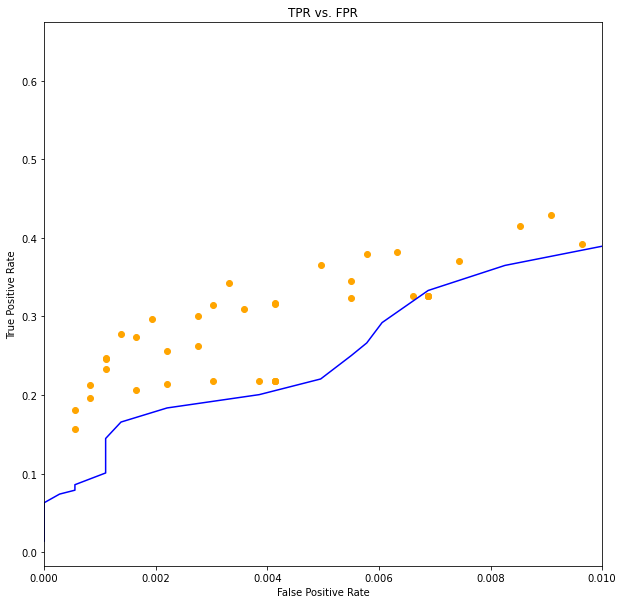

In [145]:
fig = plt.figure(figsize = (10,10))
plt.scatter(tp_fp_ratio_np[:,1], tp_fp_ratio_np[:,0], color = "orange")
plt.plot(tp_fp_ratio_SNIDxSuperfit_np[:,1], tp_fp_ratio_SNIDxSuperfit_np[:,0], color = "blue")
plt.xlim(0,0.01)
plt.title("TPR vs. FPR")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [146]:
tp_fp_ratio_np[np.where(tp_fp_ratio_np[:,0] == np.max(tp_fp_ratio_np[tp_fp_ratio_np[:,1] < 0.005][:,0]))]

array([[0.36490528414755735, 0.00495458298926507, (8.0, 5)]], dtype=object)

In [147]:
tp_fp_ratio_SNIDxSuperfit_np = np.load("tf_fp_rcfI_SNIDxSuperfit.npy")

Text(0, 0.5, 'True Positive Rate')

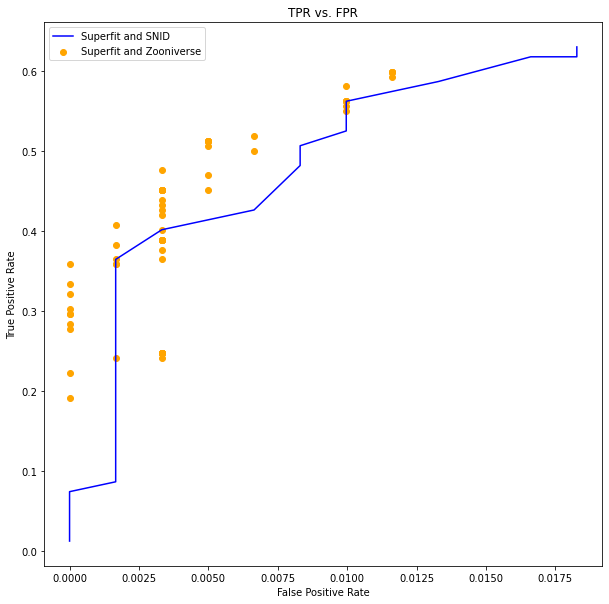

In [148]:
fig = plt.figure(figsize = (10,10))
plt.scatter(tp_fp_ratio_rcf_np[:,1], tp_fp_ratio_rcf_np[:,0], color = "orange", label = "Superfit and Zooniverse")
plt.plot(tp_fp_ratio_SNIDxSuperfit_np[:,1], tp_fp_ratio_SNIDxSuperfit_np[:,0], color = "blue", label = "Superfit and SNID")
plt.legend(fancybox=True)
plt.title("TPR vs. FPR")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [149]:
tp_fp_ratio_rcf_np[np.where(tp_fp_ratio_rcf_np[:,0] == np.max(tp_fp_ratio_rcf_np[tp_fp_ratio_rcf_np[:,1] < 0.005][:,0]))]

array([[0.5123456790123457, 0.0049833887043189366, (0.0, 6)],
       [0.5123456790123457, 0.0049833887043189366, (1.0, 6)],
       [0.5123456790123457, 0.0049833887043189366, (2.0, 6)],
       [0.5123456790123457, 0.0049833887043189366, (3.0, 6)],
       [0.5123456790123457, 0.0049833887043189366, (4.0, 6)]],
      dtype=object)

In [150]:
np.where(tp_fp_ratio_rcf_np[:,2] == (8.0, 5))

<ipython-input-150-7c6caedcee89>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  np.where(tp_fp_ratio_rcf_np[:,2] == (8.0, 5))


(array([], dtype=int64),)

In [151]:
tp_fp_ratio_rcf_np[-17]

array([0.41975308641975306, 0.0033222591362126247, (8.0, 5)], dtype=object)

In [152]:
tp_fp_ratio_SNIDxSuperfit_np_2018 = np.load("tf_fp_2018_SNIDxSuperfit.npy")

In [153]:
tp_fp_ratio_SNID_np_2018 = np.load("tf_fp_2018_SNID.npy")

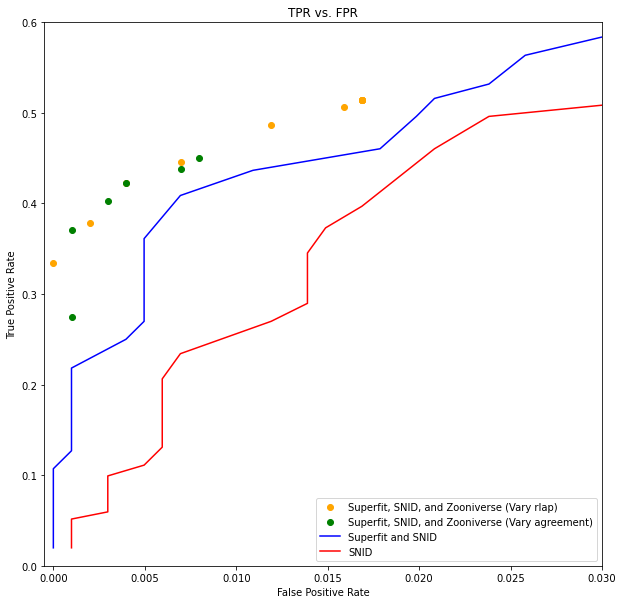

In [158]:
fig = plt.figure(figsize = (10,10))
line1 = plt.scatter(tp_fp_ratio_2018_np[tp_fp_ratio_2018_np[:,3] == 6][:,1], tp_fp_ratio_2018_np[tp_fp_ratio_2018_np[:,3] == 6][:,0], color = "orange", label = "Superfit, SNID, and Zooniverse (Vary rlap)")
line2 = plt.scatter(tp_fp_ratio_2018_np[tp_fp_ratio_2018_np[:,2] == 8][:,1], tp_fp_ratio_2018_np[tp_fp_ratio_2018_np[:,2] == 8][:,0], color = "green", label = "Superfit, SNID, and Zooniverse (Vary agreement)")
line3, = plt.plot(tp_fp_ratio_SNIDxSuperfit_np_2018[:,1], tp_fp_ratio_SNIDxSuperfit_np_2018[:,0], color = "blue")
line4, = plt.plot(tp_fp_ratio_SNID_np_2018[:,1], tp_fp_ratio_SNID_np_2018[:,0], color = "red")
plt.legend([line1,line2,line3,line4],["Superfit, SNID, and Zooniverse (Vary rlap)", "Superfit, SNID, and Zooniverse (Vary agreement)", "Superfit and SNID", "SNID"],fancybox = True, loc = 4)
plt.xlim(-0.0005,0.03)
plt.ylim(0,0.6)
plt.title("TPR vs. FPR")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.savefig("figures/roc_curve.pdf", dpi = 1200, bbox_inches = "tight")

In [155]:
tp_fp_ratio_2018_np[np.where(tp_fp_ratio_2018_np[:,0] == np.max(tp_fp_ratio_2018_np[tp_fp_ratio_2018_np[:,1] < 0.005][:,0]))]

array([[4.22310757e-01, 3.97219464e-03, 8.00000000e+00, 6.00000000e+00]])

In [156]:
tp_fp_ratio_2018_np[tp_fp_ratio_2018_np[:,2] == 8]

array([[4.50199203e-01, 7.94438928e-03, 8.00000000e+00, 4.00000000e+00],
       [4.38247012e-01, 6.95134062e-03, 8.00000000e+00, 5.00000000e+00],
       [4.22310757e-01, 3.97219464e-03, 8.00000000e+00, 6.00000000e+00],
       [4.02390438e-01, 2.97914598e-03, 8.00000000e+00, 7.00000000e+00],
       [3.70517928e-01, 9.93048659e-04, 8.00000000e+00, 8.00000000e+00],
       [2.74900398e-01, 9.93048659e-04, 8.00000000e+00, 9.00000000e+00]])

In [139]:
line3